## 형태소 분석(re)
- okt

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
from tqdm import tqdm

In [1]:
#from PyKomoran import *

In [2]:
#komoran = Komoran("STABLE")

In [2]:
df = pd.read_excel('crawl/2019cafe_content_spell_checked.xlsx')
df.head()

,content,spell_checked
0,벌레얘기 죄송해요 ㅠ쌀을 상온 보관 중인데 냉장고에 도저히 자리가 안나서 혹시나 쌀...,벌레 얘기 죄송해요 ㅠ쌀을 상온 보관 중인데 냉장고에 도저히 자리가 안 나서 혹시나...
1,오늘 저희 집 쌀이 없어서 식은 분식으로 떼웠는데남편이가 쌀을 사오긴 사왔는데매대...,오늘 저희 집 쌀이 없어서 식은 분식으로 때웠는데 남편이 가 쌀을 사 오긴 사 왔...
2,처음와서는 일본품종쌀 주문해먹었었고 그담엔 한국쌀먹었는데 마트에서 한국아주머니께서 ...,처음 와서는 일본 품종 쌀 주문해먹었었고 그 담엔 한국쌀 먹었는데 마트에서 한국 아...
3,전에 친정가서 이 쌀로 밥을 하셔서 먹었는데 엄 청 맛있어서 항상 밥맛없어하는 저희...,전에 친정 가서 이 쌀로 밥을 하셔서 먹었는데 엄 청 맛있어서 항상 밥맛없어하는 저...
4,식빵을 만드려니 밀가루가 똑 떨어져서급주문하고 언제적 사두었던 쌀가루가있어서 쌀식빵...,식빵을 만들려니 밀가루가 똑떨어져서 급주문하고 언제 적 사두었던 쌀가루가 있어서 쌀...


In [3]:
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    result = hangul.sub(' ', str(text))
    return result

df['content'] = df['content'].apply(lambda x : text_cleaning(x))
df.head(10)

,content,spell_checked
0,벌레얘기 죄송해요 ㅠ쌀을 상온 보관 중인데 냉장고에 도저히 자리가 안나서 혹시나 쌀...,벌레 얘기 죄송해요 ㅠ쌀을 상온 보관 중인데 냉장고에 도저히 자리가 안 나서 혹시나...
1,오늘 저희 집 쌀이 없어서 식은 분식으로 떼웠는데남편이가 쌀을 사오긴 사왔는데매대...,오늘 저희 집 쌀이 없어서 식은 분식으로 때웠는데 남편이 가 쌀을 사 오긴 사 왔...
2,처음와서는 일본품종쌀 주문해먹었었고 그담엔 한국쌀먹었는데 마트에서 한국아주머니께서 ...,처음 와서는 일본 품종 쌀 주문해먹었었고 그 담엔 한국쌀 먹었는데 마트에서 한국 아...
3,전에 친정가서 이 쌀로 밥을 하셔서 먹었는데 엄 청 맛있어서 항상 밥맛없어하는 저희...,전에 친정 가서 이 쌀로 밥을 하셔서 먹었는데 엄 청 맛있어서 항상 밥맛없어하는 저...
4,식빵을 만드려니 밀가루가 똑 떨어져서급주문하고 언제적 사두었던 쌀가루가있어서 쌀식빵...,식빵을 만들려니 밀가루가 똑떨어져서 급주문하고 언제 적 사두었던 쌀가루가 있어서 쌀...
5,수업은 직접 시연하시며 반죽하나로우유쌀식빵 단팥소보로쌀식빵 치즈먹물쌀식빵 시...,수업은 직접 시연하시며 반죽 하나로 우유 쌀 식빵 단팥 곰보빵 쌀 식빵 치즈 ...
6,아직 케이크 먹지 못하는 아들 생일을 기회로 엄마가 먹고 싶은 딸기 쌀 케이크 촛...,아직 케이크 먹지 못하는 아들 생일을 기회로 엄마가 먹고 싶은 딸기 쌀 케이크 촛...
7,안동농협에서 두부를 보냈어요 배송 문자와서 내가 두부를 시켰나 하고 고민도 해보...,안동농협에서 두부를 보냈어요 배송 문자 와서 내가 두부를 시켰나 하고 고민도 해...
8,사진에는 잘 안보이는데 시골에서 보내주신 쌀 두 포대 오늘 뜯어보니 다 현미처럼 누...,사진에는 잘 안 보이는데 시골에서 보내주신 쌀 두 포대 오늘 뜯어보니 다 현미처럼 ...
9,작년 추석때 받은 유기농 쌀 키로 짜리가 개 총 키로가 있습니다 평소 시골에서...,작년 추석 때 받은 유기농 쌀 키로 짜리가 개 총 키로가 있습니다 평소 시골에...


In [4]:
for i in range(len(df['content'])):
    if len(df['content'][i]) == 0:
        df = df.drop(index=i)

In [5]:
import konlpy
import re

In [6]:
from konlpy.tag import Okt
from collections import Counter

In [7]:
stopwords = ['쌀','요','분','때','오늘','것','더','개','일','좀','정도','혹시','저','곳','수','원',
             '거','시작','제','판매','월','시간','전','초기','그냥','후','사용','글','신분','년','구매',
             '중','이','해','생각','처음','시','안','이제','킹','용','조금','한번','맘','하나','지금',
             '우리','또','어제','바로','키','이번','걸','도','만','아시','이상','보고','번','정말','달',
             '계속','가지','다시','구','다른','댓글','중기','구입','그','저희','요즘','어디','등','베이']

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    #불용어 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    return nouns

# 'ko_text' 피처에 적용
df['nouns'] = df['content'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(9828, 3)


,content,spell_checked,nouns
0,벌레얘기 죄송해요 ㅠ쌀을 상온 보관 중인데 냉장고에 도저히 자리가 안나서 혹시나 쌀...,벌레 얘기 죄송해요 ㅠ쌀을 상온 보관 중인데 냉장고에 도저히 자리가 안 나서 혹시나...,"[벌레, 얘기, 상온, 보관, 냉장고, 도저히, 자리, 안나, 쌀벌레, 마늘, 숯,..."
1,오늘 저희 집 쌀이 없어서 식은 분식으로 떼웠는데남편이가 쌀을 사오긴 사왔는데매대...,오늘 저희 집 쌀이 없어서 식은 분식으로 때웠는데 남편이 가 쌀을 사 오긴 사 왔...,"[집, 분식, 떼웠, 남편, 매, 계산, 우린, 보통, 잘못, 쌀값, 내일, 아침,..."
2,처음와서는 일본품종쌀 주문해먹었었고 그담엔 한국쌀먹었는데 마트에서 한국아주머니께서 ...,처음 와서는 일본 품종 쌀 주문해먹었었고 그 담엔 한국쌀 먹었는데 마트에서 한국 아...,"[일본, 품종, 주문, 담, 한국, 마트, 한국, 아주머니, 현지, 따라서, 냄새,..."
3,전에 친정가서 이 쌀로 밥을 하셔서 먹었는데 엄 청 맛있어서 항상 밥맛없어하는 저희...,전에 친정 가서 이 쌀로 밥을 하셔서 먹었는데 엄 청 맛있어서 항상 밥맛없어하는 저...,"[친정, 밥, 엄, 청, 항상, 밥맛, 아들, 엄마, 포장, 지도, 단지, 생협, ..."
4,식빵을 만드려니 밀가루가 똑 떨어져서급주문하고 언제적 사두었던 쌀가루가있어서 쌀식빵...,식빵을 만들려니 밀가루가 똑떨어져서 급주문하고 언제 적 사두었던 쌀가루가 있어서 쌀...,"[식빵, 밀가루, 똑, 급, 주문, 제적, 사, 가루, 식빵, 식빵, 걱정, 오븐,..."


In [8]:
# 트랜잭션 데이터 추출
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열 방지

In [9]:
ex_list=[]
for i in transactions:
    for j in i:
        ex_list.append(j)

In [28]:
 ex_str = ",".join(map(str, ex_list))

In [30]:
af_list = []
for item in ex_list:
    af = ex_str.replace("아기","아이").split(',')
    af_list.append(af)
print(af_list)

In [22]:
ex_list

['벌레',
 '얘기',
 '상온',
 '보관',
 '냉장고',
 '도저히',
 '자리',
 '안나',
 '쌀벌레',
 '마늘',
 '숯',
 '조각',
 '밥',
 '사이사이',
 '숯',
 '조각',
 '보',
 '숯',
 '숯',
 '조각',
 '아주',
 '벌레',
 '숯',
 '위로',
 '아주',
 '작고',
 '자',
 '모양',
 '보아',
 '먼지다듬이',
 '얘',
 '벌레',
 '생기지',
 '말',
 '숯',
 '위',
 '활보',
 '마늘',
 '숯',
 '별로',
 '냉장',
 '보관',
 '정답',
 '수저',
 '위',
 '숯',
 '조각',
 '원래',
 '조각',
 '숯',
 '위',
 '표시',
 '벌레',
 '집',
 '분식',
 '떼웠',
 '남편',
 '매',
 '계산',
 '우린',
 '보통',
 '잘못',
 '쌀값',
 '내일',
 '아침',
 '손',
 '부들부들',
 '쌀통',
 '남편',
 '고우리',
 '집',
 '머슴',
 '자고',
 '단',
 '톨',
 '욬',
 '털',
 '팔이',
 '경상도',
 '사투리',
 '말괄량이',
 '뜻',
 '줄줄',
 '역시',
 '사람',
 '의지',
 '조절',
 '규',
 '취사',
 '예약',
 '들보',
 '항상',
 '바느질',
 '박음질',
 '처럼',
 '원래',
 '실',
 '풀',
 '촤르르르',
 '저걸',
 '늘',
 '일본',
 '품종',
 '주문',
 '담',
 '한국',
 '마트',
 '한국',
 '아주머니',
 '현지',
 '따라서',
 '냄새',
 '값',
 '한국',
 '반값',
 '한국',
 '도하',
 '고요',
 '애',
 '거부',
 '감',
 '식구',
 '사도',
 '자주',
 '친정',
 '밥',
 '엄',
 '청',
 '항상',
 '밥맛',
 '아들',
 '엄마',
 '포장',
 '지도',
 '단지',
 '생협',
 '포기',
 '마',
 '컬',
 '향',
 '밥',
 '냄새',
 '달라',
 '관심',
 '아이',
 '무

In [10]:
from collections import Counter

In [11]:
count = Counter(ex_list)
count

Counter({'벌레': 452,
         '얘기': 74,
         '상온': 31,
         '보관': 770,
         '냉장고': 235,
         '도저히': 19,
         '자리': 88,
         '안나': 62,
         '쌀벌레': 182,
         '마늘': 40,
         '숯': 11,
         '조각': 54,
         '밥': 1948,
         '사이사이': 4,
         '보': 167,
         '아주': 192,
         '위로': 18,
         '작고': 8,
         '자': 45,
         '모양': 159,
         '보아': 53,
         '먼지다듬이': 7,
         '얘': 26,
         '생기지': 12,
         '말': 298,
         '위': 227,
         '활보': 1,
         '별로': 133,
         '냉장': 146,
         '정답': 16,
         '수저': 27,
         '원래': 215,
         '표시': 38,
         '집': 977,
         '분식': 7,
         '떼웠': 1,
         '남편': 223,
         '매': 63,
         '계산': 26,
         '우린': 9,
         '보통': 184,
         '잘못': 101,
         '쌀값': 34,
         '내일': 304,
         '아침': 303,
         '손': 264,
         '부들부들': 9,
         '쌀통': 119,
         '고우리': 3,
         '머슴': 1,
         '자고': 30,
         '단': 138

In [12]:
words = dict(count.most_common())
words

{'가루': 4035,
 '밥': 1948,
 '맛': 1698,
 '이유식': 1685,
 '미음': 1004,
 '집': 977,
 '아이': 891,
 '물': 887,
 '아기': 839,
 '주문': 828,
 '식빵': 799,
 '보관': 770,
 '과자': 768,
 '떡': 675,
 '찹쌀': 674,
 '현미': 642,
 '추천': 640,
 '빵': 625,
 '케이크': 615,
 '마트': 582,
 '수업': 561,
 '밀가루': 490,
 '사진': 487,
 '도정': 471,
 '유기농': 469,
 '벌레': 452,
 '가격': 448,
 '직접': 442,
 '레시피': 429,
 '간식': 413,
 '포장': 404,
 '만원': 384,
 '카페': 380,
 '반죽': 375,
 '유통': 375,
 '통': 372,
 '곰팡이': 370,
 '재료': 361,
 '기한': 352,
 '배달': 343,
 '햅쌀': 338,
 '택배': 334,
 '저녁': 332,
 '농사': 332,
 '선물': 329,
 '사서': 324,
 '개월': 323,
 '가요': 319,
 '후기': 318,
 '포대': 313,
 '엄마': 309,
 '준비': 305,
 '내일': 304,
 '아침': 303,
 '말': 298,
 '밥맛': 297,
 '뭐': 288,
 '냄새': 287,
 '방법': 286,
 '산': 284,
 '쿠키': 284,
 '봉지': 282,
 '날': 281,
 '품종': 280,
 '박스': 277,
 '하루': 277,
 '이용': 275,
 '양': 275,
 '진짜': 274,
 '향': 272,
 '배송': 265,
 '초코': 265,
 '손': 264,
 '얼마': 261,
 '단계': 258,
 '봉': 258,
 '꼭': 257,
 '애': 253,
 '알': 251,
 '잡곡': 251,
 '박력': 250,
 '설탕': 249,
 '천원': 249,
 '인터넷': 247

In [13]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
import nltk
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
graph = nltk.Text(ex_list)
plt.figure()
plt.title('네이버카페_2019_쌀')
graph.plot(30)
plt.show()

NameError: name 'nltk' is not defined

In [15]:
import wordcloud

#이미지 불러와서 사용할 것
from PIL import Image  

# 시각화시 글자 선명하게 출력하기 위함
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

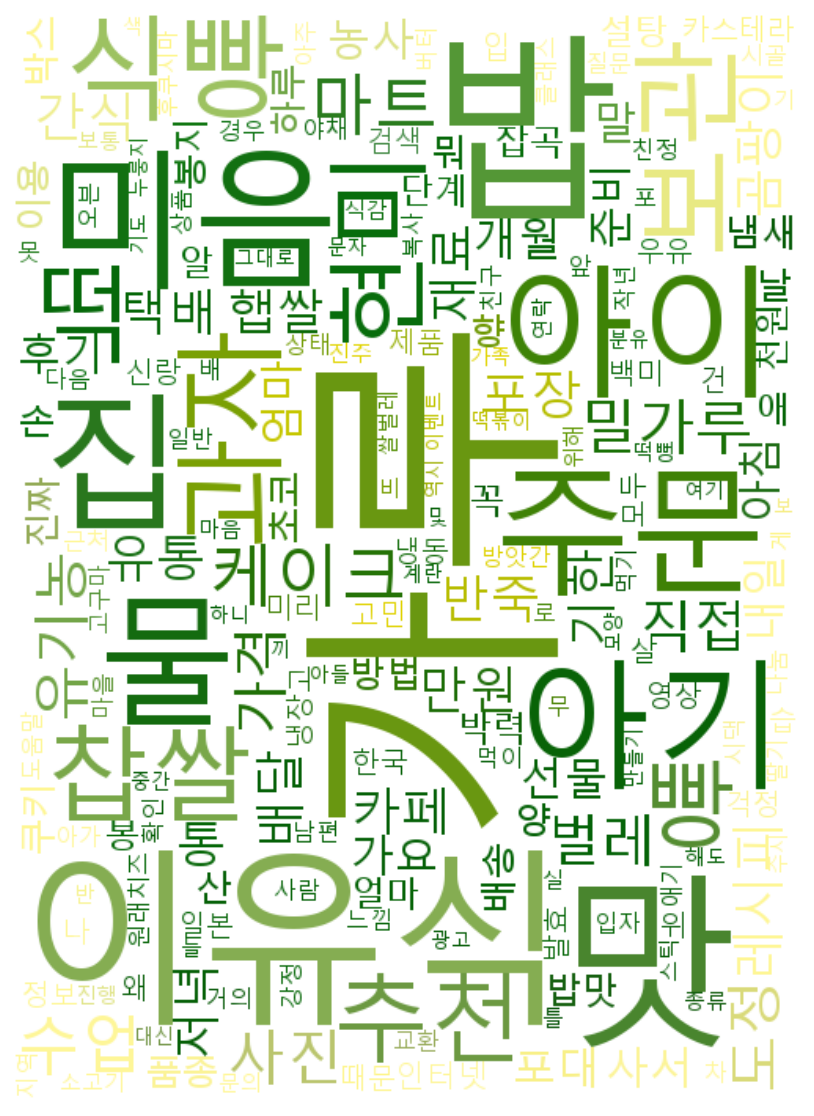

In [16]:
# 특정이미지1 이용 워드클라우드 생성
img = np.array(Image.open('image/잘살아보세.png'))
image_color = wordcloud.ImageColorGenerator(img) #이미지의 color 이용
cloud_image = wordcloud.WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                                    background_color="white", mask=img).generate_from_frequencies(words)

plt.figure(figsize=(10, 10))
plt.imshow(cloud_image.recolor(color_func=image_color),
           interpolation="bilinear")
plt.axis("off") #축설정 off
plt.show()